# Mario map
### Trying to auto generate mario-like maps

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image

In [50]:
map_tif_path = glob.glob("map_data/gm_lc_v3/*.tif")
im_full = [Image.open(path) for path in map_tif_path]

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (933120000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [51]:
scale_1 = 10
im_full_scaled = [im.resize((int(im.size[0]/scale_1),int(im.size[1]/scale_1)),
                                resample = PIL.Image.NEAREST) for im in im_full]

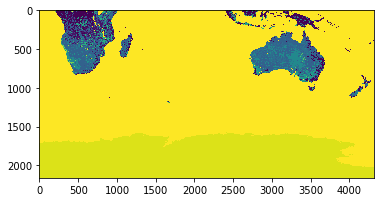

In [55]:
plt.imshow(im_full_scaled[3])
plt.show()

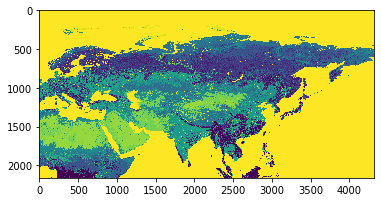

In [49]:
im_full_scaled

In [57]:
[im_full_scaled[i].size for i in range(4)]

[(4320, 2160), (4320, 2160), (4320, 2160), (4320, 2160)]

In [61]:
im_full_scaled[0].info

{'compression': 'tiff_lzw', 'dpi': (1, 1), 'resolution': (1, 1)}

In [80]:
im = Image.new("L", (im_full_scaled[0].size[0]*2,im_full_scaled[0].size[1]*2))
width = im_full_scaled[1].size[0]
height = im_full_scaled[1].size[1]
im.paste(im_full_scaled[0],(0,0))
im.paste(im_full_scaled[1],(width,0))
im.paste(im_full_scaled[2],(0,height))
im.paste(im_full_scaled[3],(width,height))
im_master = im

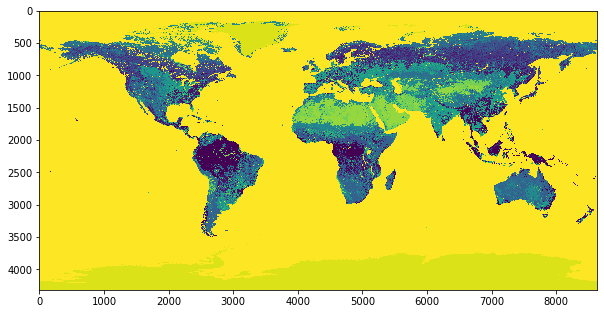

In [88]:
fig = plt.figure(figsize = (10,20))
plt.imshow(im_master, aspect = "equal")
plt.show()

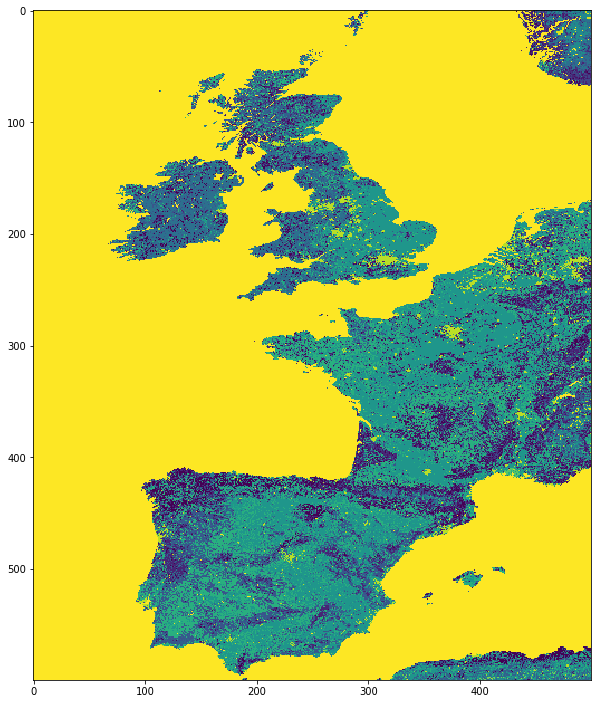

In [94]:
fig = plt.figure(figsize = (10,20))
im = im_master.crop((4000,700,4500,1300))
plt.imshow(im, aspect = "equal")
plt.show()

In [97]:
data = np.array(im)

### Now to get mario sprites